## FINAL REPORT: Predicted Chest Pain Type in Cleveland, Ohio 
(Section 002, Group 31)

## Introduction

**Background:**
    Heart disease is the leading cause of death in the United States, including the city of Cleveland in Ohio. Factors that affect the probability of contracting heart disease include, unhealthy diet, high blood pressure, high cholesterol, minimal physical activity, etc. (“Heart disease,” 2022). While heart disease symptoms depend on the type of heart disease, many common symptoms include chest pain, shortness of breath, and pain in the neck, jaw, and throat. As noted, chest pain is often associated with heart disease. Particularly angina is a chest pain caused by poor blood flow to the heart due to the buildup of thick plaques on the inner walls of the arteries carrying blood to the heart, thereby restricting the heart’s supply of blood (“Chest pain,” 2023). Several genetic and lifestyle factors contribute to the risk of developing angina. For example, there is evidence of a positive relationship between age and developing angina; an increase of plaque build up in the arteries is correlated with an increase in age (“Causes and risk,” n.d.).  

**Question:** Is it possible to predict chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) for a given heart disease patient based on various revelent medical factors and patient information?

**Dataset:** Cleveland Heart Disease Processed Data set from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. The sample size (ie. number of rows) of this dataset is 303, and there are 14 columns. The data will be further described throughout our preliminary and exploratory data analysis. 

## Preliminary & Exploratory Data Analysis

Here, we will read, tidy, summarize, and visualize the dataset. Ultimately in this section, we want to find our variables of interest to use as predictors for our classification model.


First, we will start by reading in the dataset from its URL code. The data is untidy - there are no column names, and some variables that should be categorical are categorized as numerical variables instead. We must tidy the data before continuing further data analysis. Our tidy data has proper readable column names, and the variables are correctly categorized (ie. categorical values are listed numerically), which may be unhelpful when trying to visualize and understand the data in R. It is much easier to do data analysis and build a classification model from tidy data. 


We will rename the columns so that they are named as the correct variable as listed in the Cleveland Heart Disease Dataset description. Then, since we are not using all the variables given in the dataset, we will select specific columns based on our variables of interest to clean and wrangle the data further. For instance, some columns are unspecified or don't have enough information on their meaning from the website (thal, oldpeak, slope, ca, and num), and when tested further there proved to be no significant relationship that would deem them as possible predictor variables in predicting chest pain type and so we decided not include them in our data analysis. Next, we will mutate certain variables (cp, sex, and exang)and change the type of character they were listed as, so that they are categorical and not numerical. 

In [2]:
#attach necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
#read data
#add names to columns based on information from website
#clean and wrangle data
#select columns within the dataset corresponding with our selected variables of interest 
#mutate certain rows to change the type of character a variable is listed as 

data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           col_names = FALSE)
heart_data <- data |> 
        rename(
            age = X1,
            sex = X2,
            cp = X3,
            restbp = X4,
            chol = X5,
            fbs = X6, 
            restecg = X7,
            thalach = X8,
            exang = X9,
            oldpeak = X10,
            slope = X11,
            ca = X12,
            thal = X13,
            num = X14) 

filter_data <- heart_data|>
    select(cp, age, restbp, chol, thalach, sex, exang)|>
    mutate(cp = as_factor(cp)) |>
    mutate(sex = as_factor(sex)) |>
    mutate(exang = as_factor(exang))
filter_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cp,age,restbp,chol,thalach,sex,exang
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,63,145,233,150,1,0
4,67,160,286,108,1,1
4,67,120,229,129,1,1
3,37,130,250,187,1,0
2,41,130,204,172,0,0
2,56,120,236,178,1,0
4,62,140,268,160,0,0
4,57,120,354,163,0,1
4,63,130,254,147,1,0


Now, we will split the data into a training and testing set. Our split ratio will be 75:25, meaning that 75% of our data will end up in the training set while the remaining 25% will end up in the testing set,  this ensures the majority of the data is used to train the model. Since splitting the data is a randomized process, we will use the function set.seed to ensure reproducibility. The data will be split into a training set to train our classifier, and a testing set to test its accuracy. In testing the performance of the classifier on new unseen data, we can ensure that the model is reliable and accurate in predicting chest pain type and can be generalized to new data.

In [4]:
#split data into training and testing, with 75% of data as training.
set.seed(2000)

heart_split <- initial_split(filter_data, prop = 0.75, strata=cp)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [24]:
#using training data, summarize data into tables of count, mean values, and median values
count_cp <- heart_train|>
    group_by(cp)|>
    summarize(count = n()) |>
    mutate(percent = 100*count/nrow(heart_train))
count_cp

mean_variables <- heart_train |>
    group_by(cp) |>
    summarize(mean_age=mean(age, na.rm=TRUE),
             mean_restbp=mean(restbp, na.rm=TRUE),
             mean_chol=mean(chol, na.rm=TRUE),
             mean_thalach=mean(thalach, na.rm=TRUE))
mean_variables

median_variables <- heart_train |>
    group_by(cp) |>
    summarize(median_age=median(age, na.rm=TRUE),
             median_restbp=median(restbp, na.rm=TRUE),
             median_chol=median(chol, na.rm=TRUE),
             median_thalach=median(thalach, na.rm=TRUE))
median_variables

cp,count,percent
<fct>,<int>,<dbl>
1,19,8.444444
2,36,16.000000
3,63,28.000000
4,107,47.555556


cp,mean_age,mean_restbp,mean_chol,mean_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,56.52632,140.6316,239.7895,153.8421
2,50.25000,127.7500,235.8333,163.9722
3,54.69841,130.3968,244.4603,155.2063
4,55.25234,132.6636,250.4393,142.0093


cp,median_age,median_restbp,median_chol,median_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,140,234,155
2,51,128,225,165
3,54,130,240,157
4,57,130,248,143


Based on our summary data above, we can interpret some of the relationships and trends between `cp` and the variables of interest. We can see that a majority of our data contains points for `cp` = 4, making asymptomic angina the most common type of angina within our dataset. 

In [25]:
#attach new libraries for visualizing data
library(RColorBrewer)
library(gridExtra)

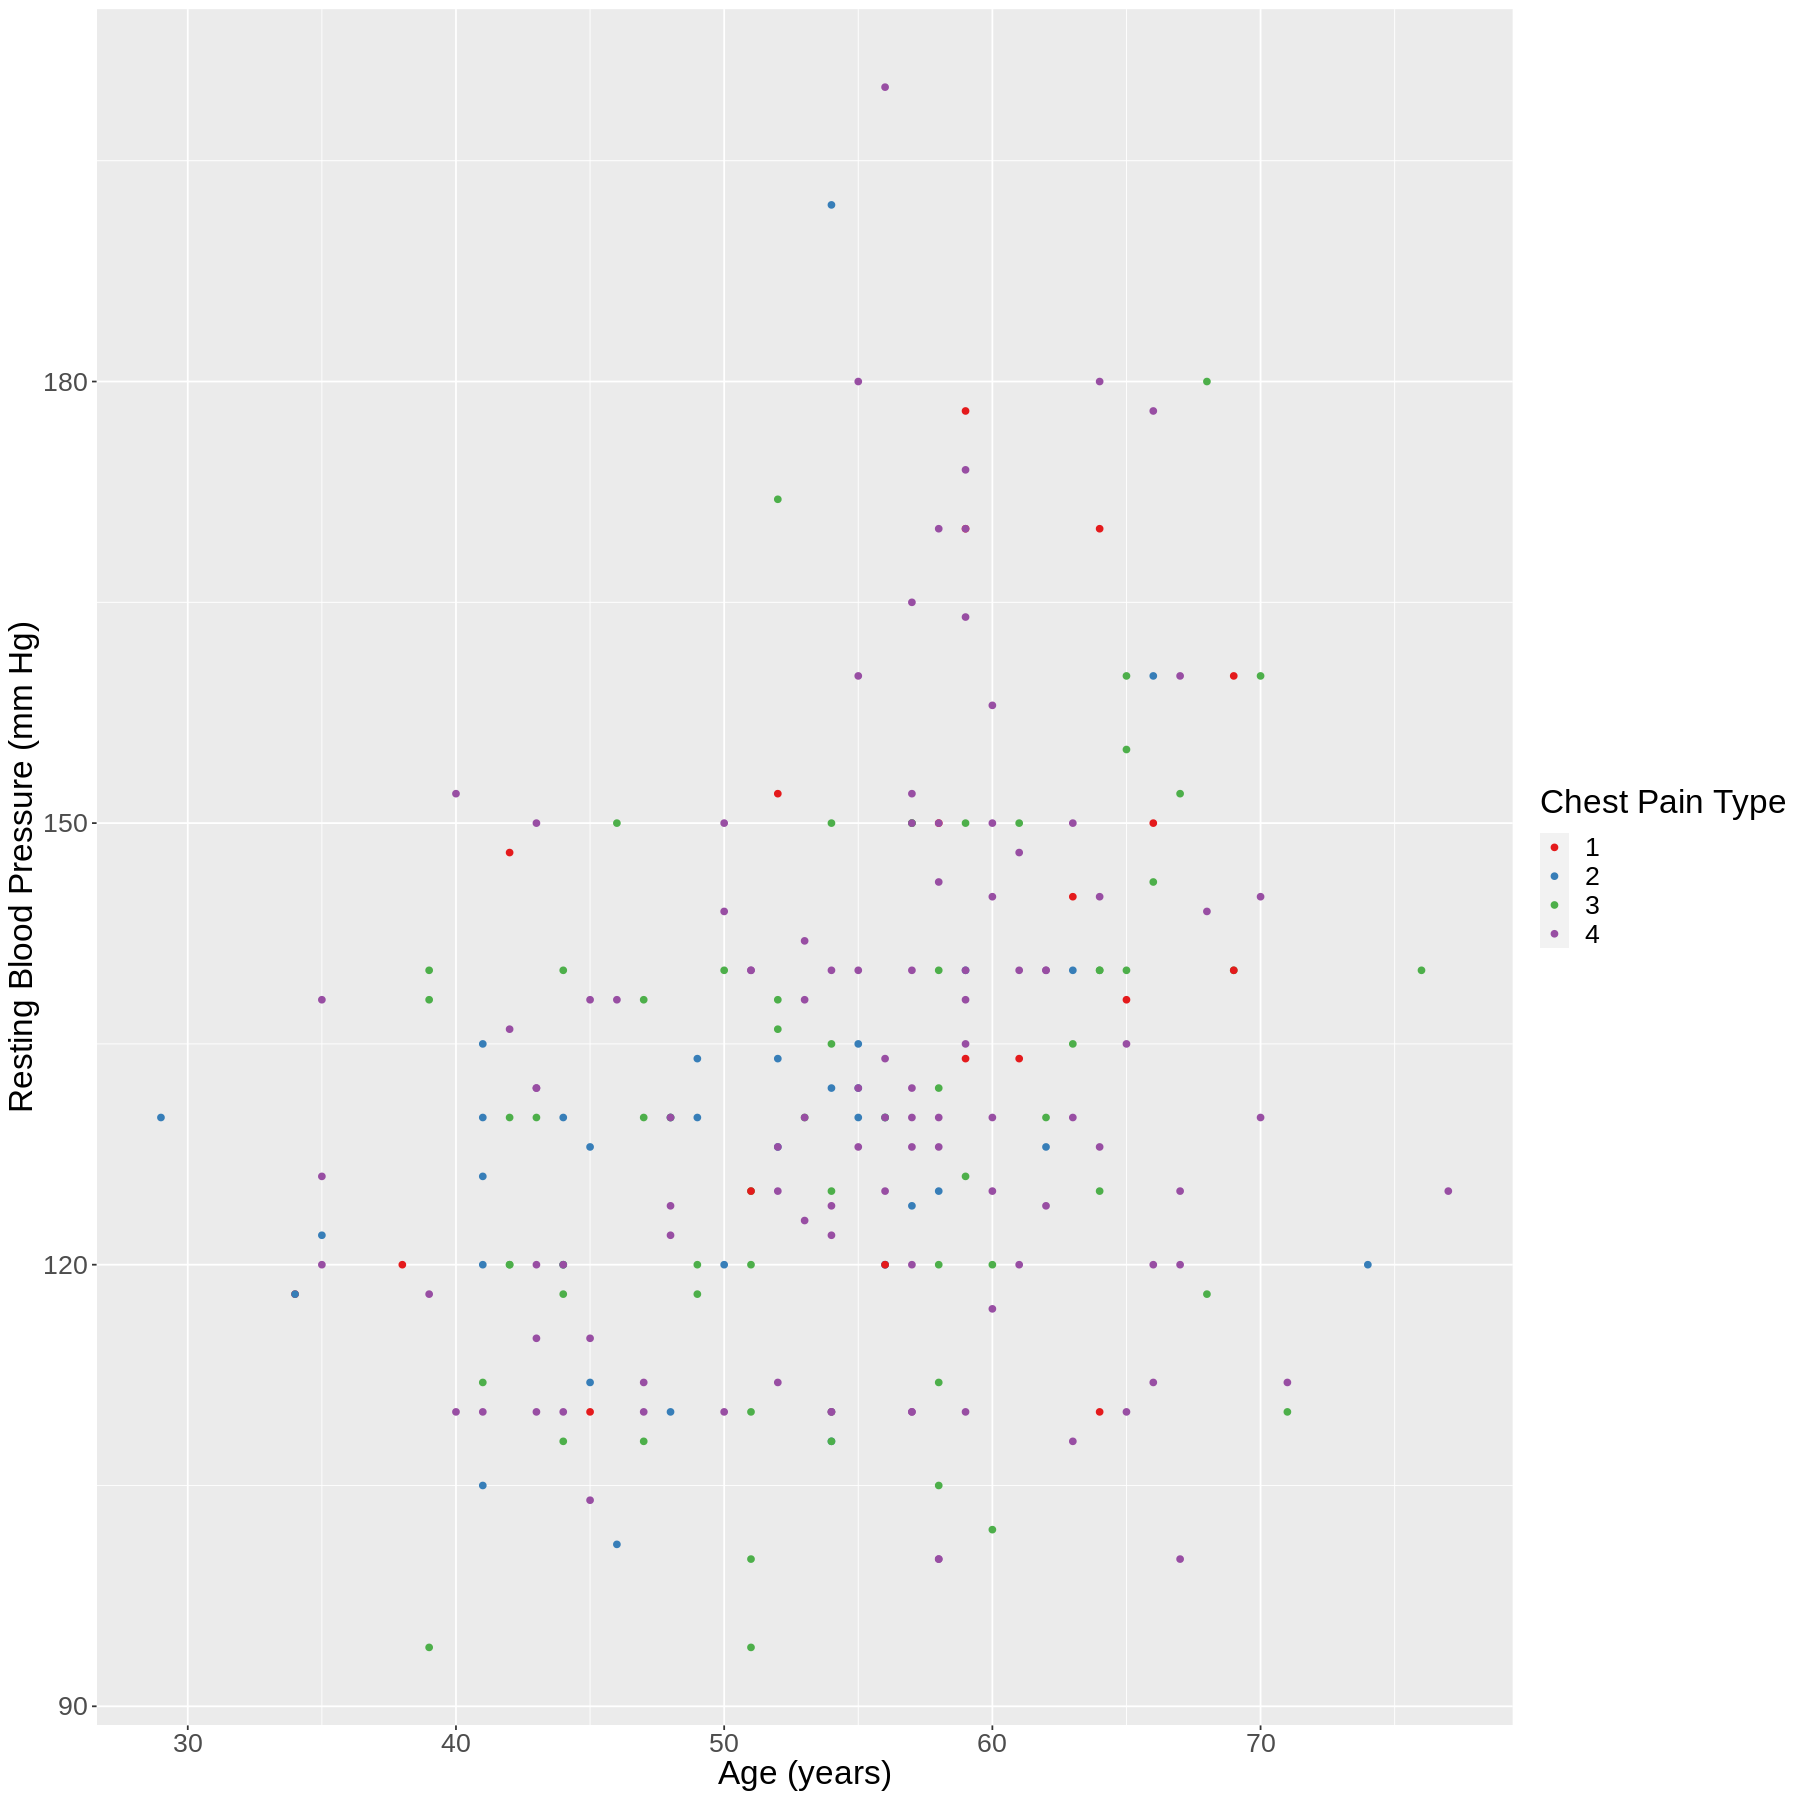

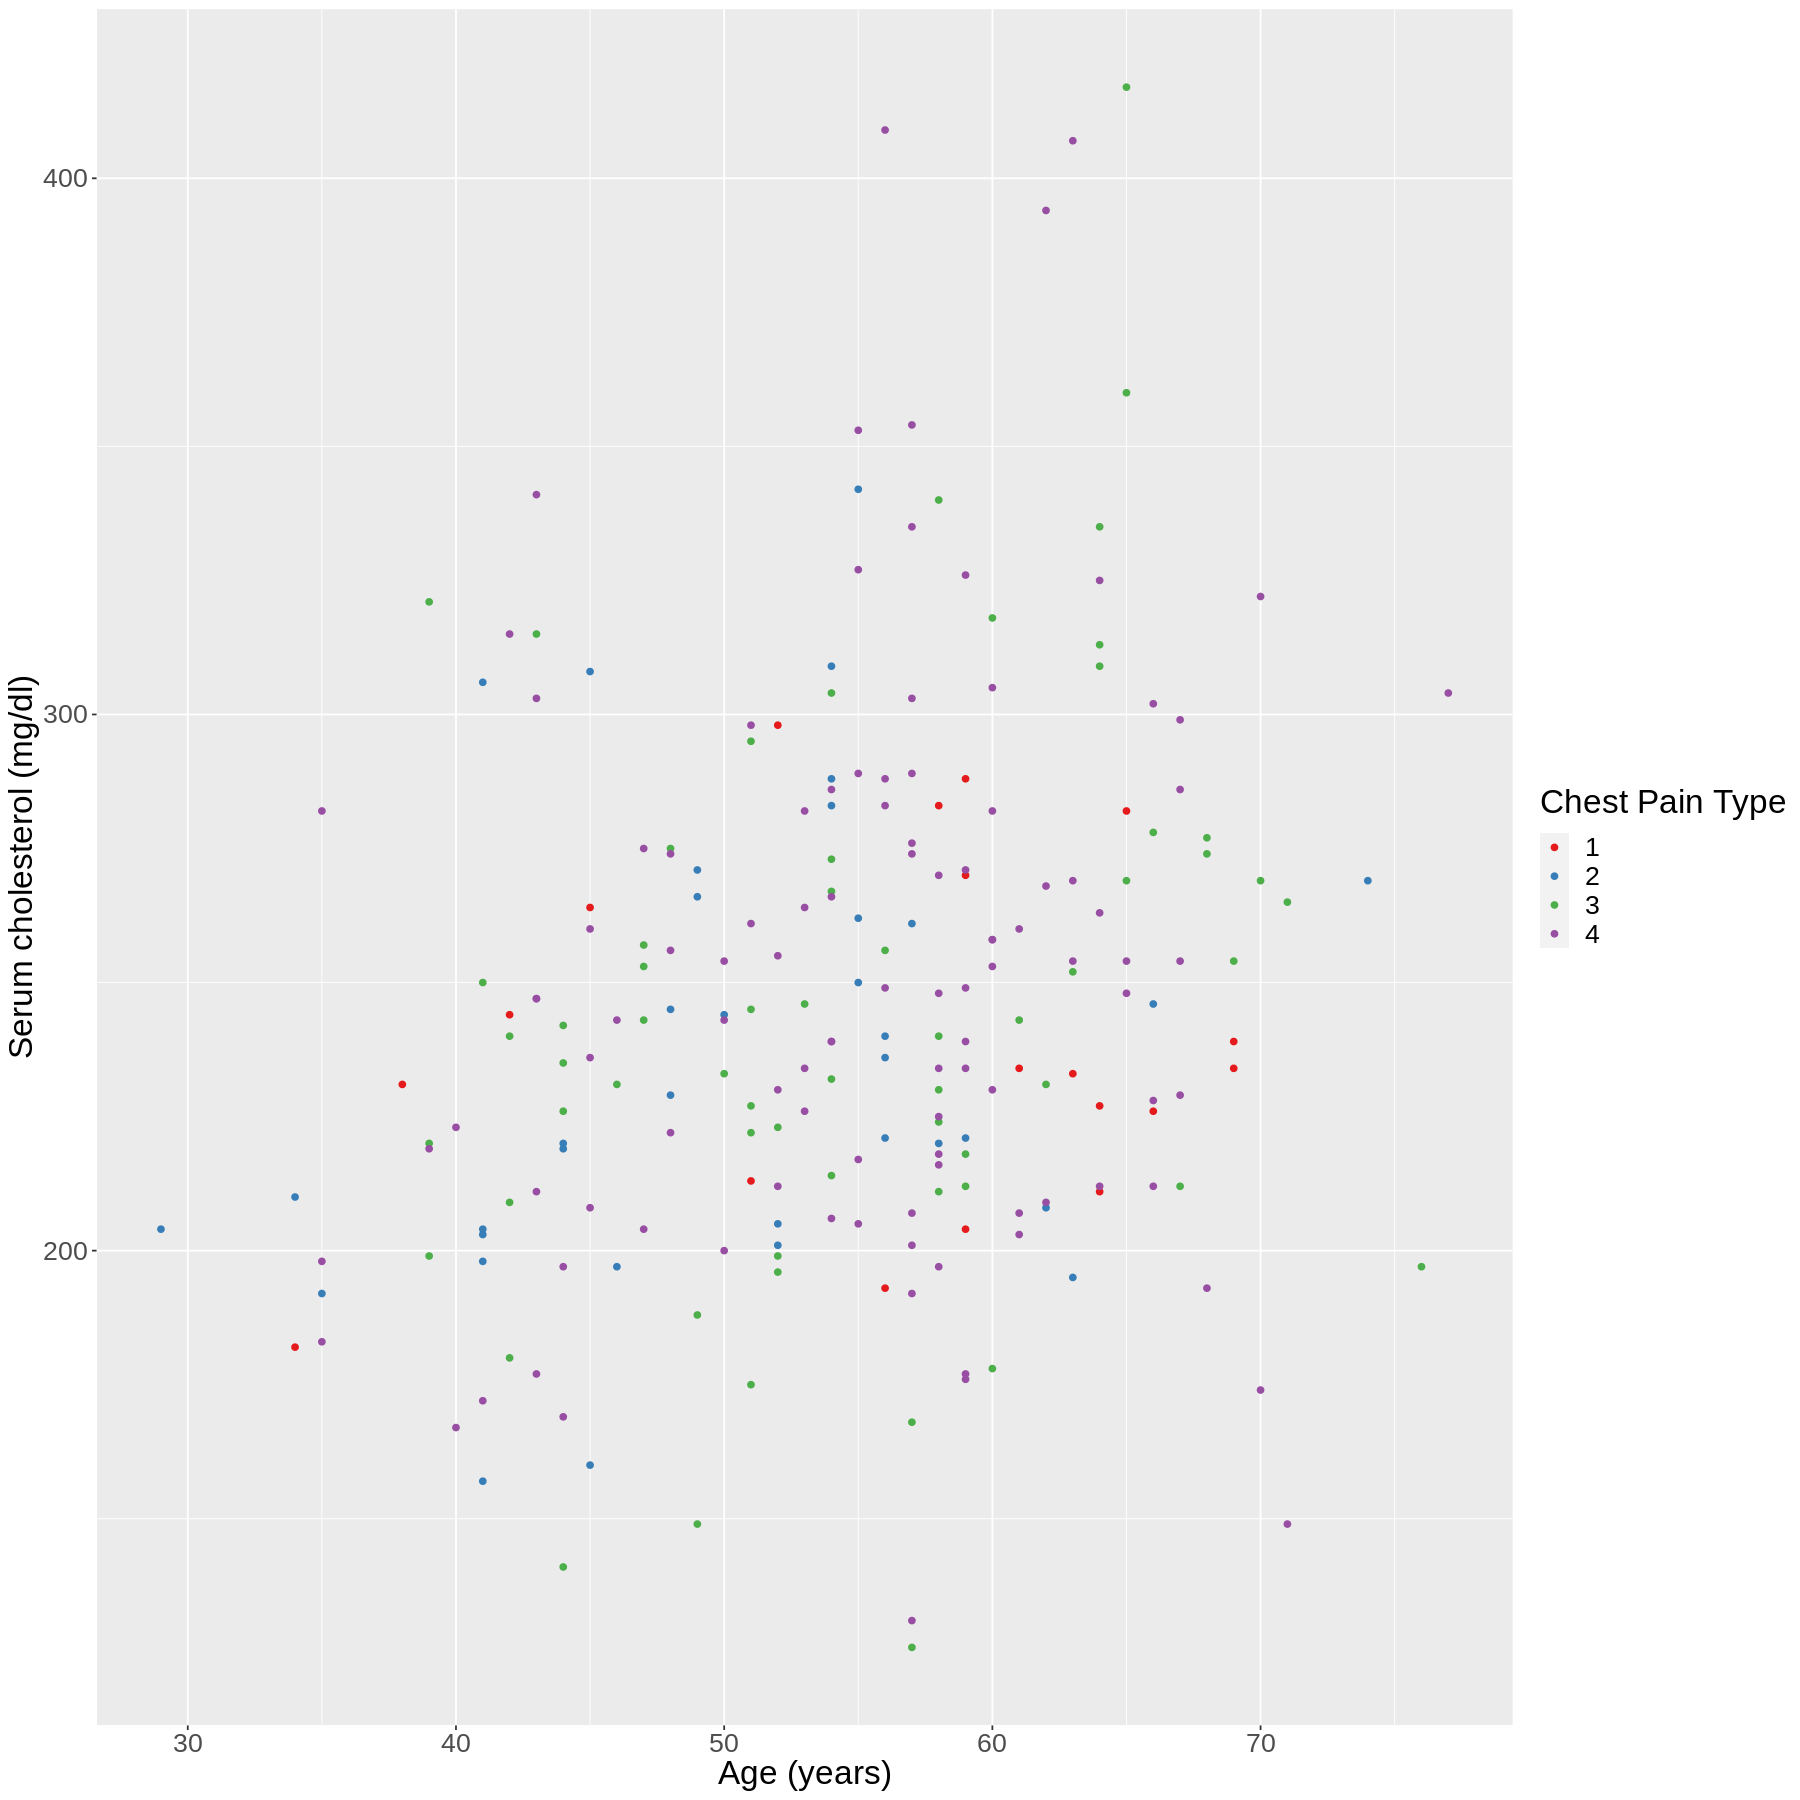

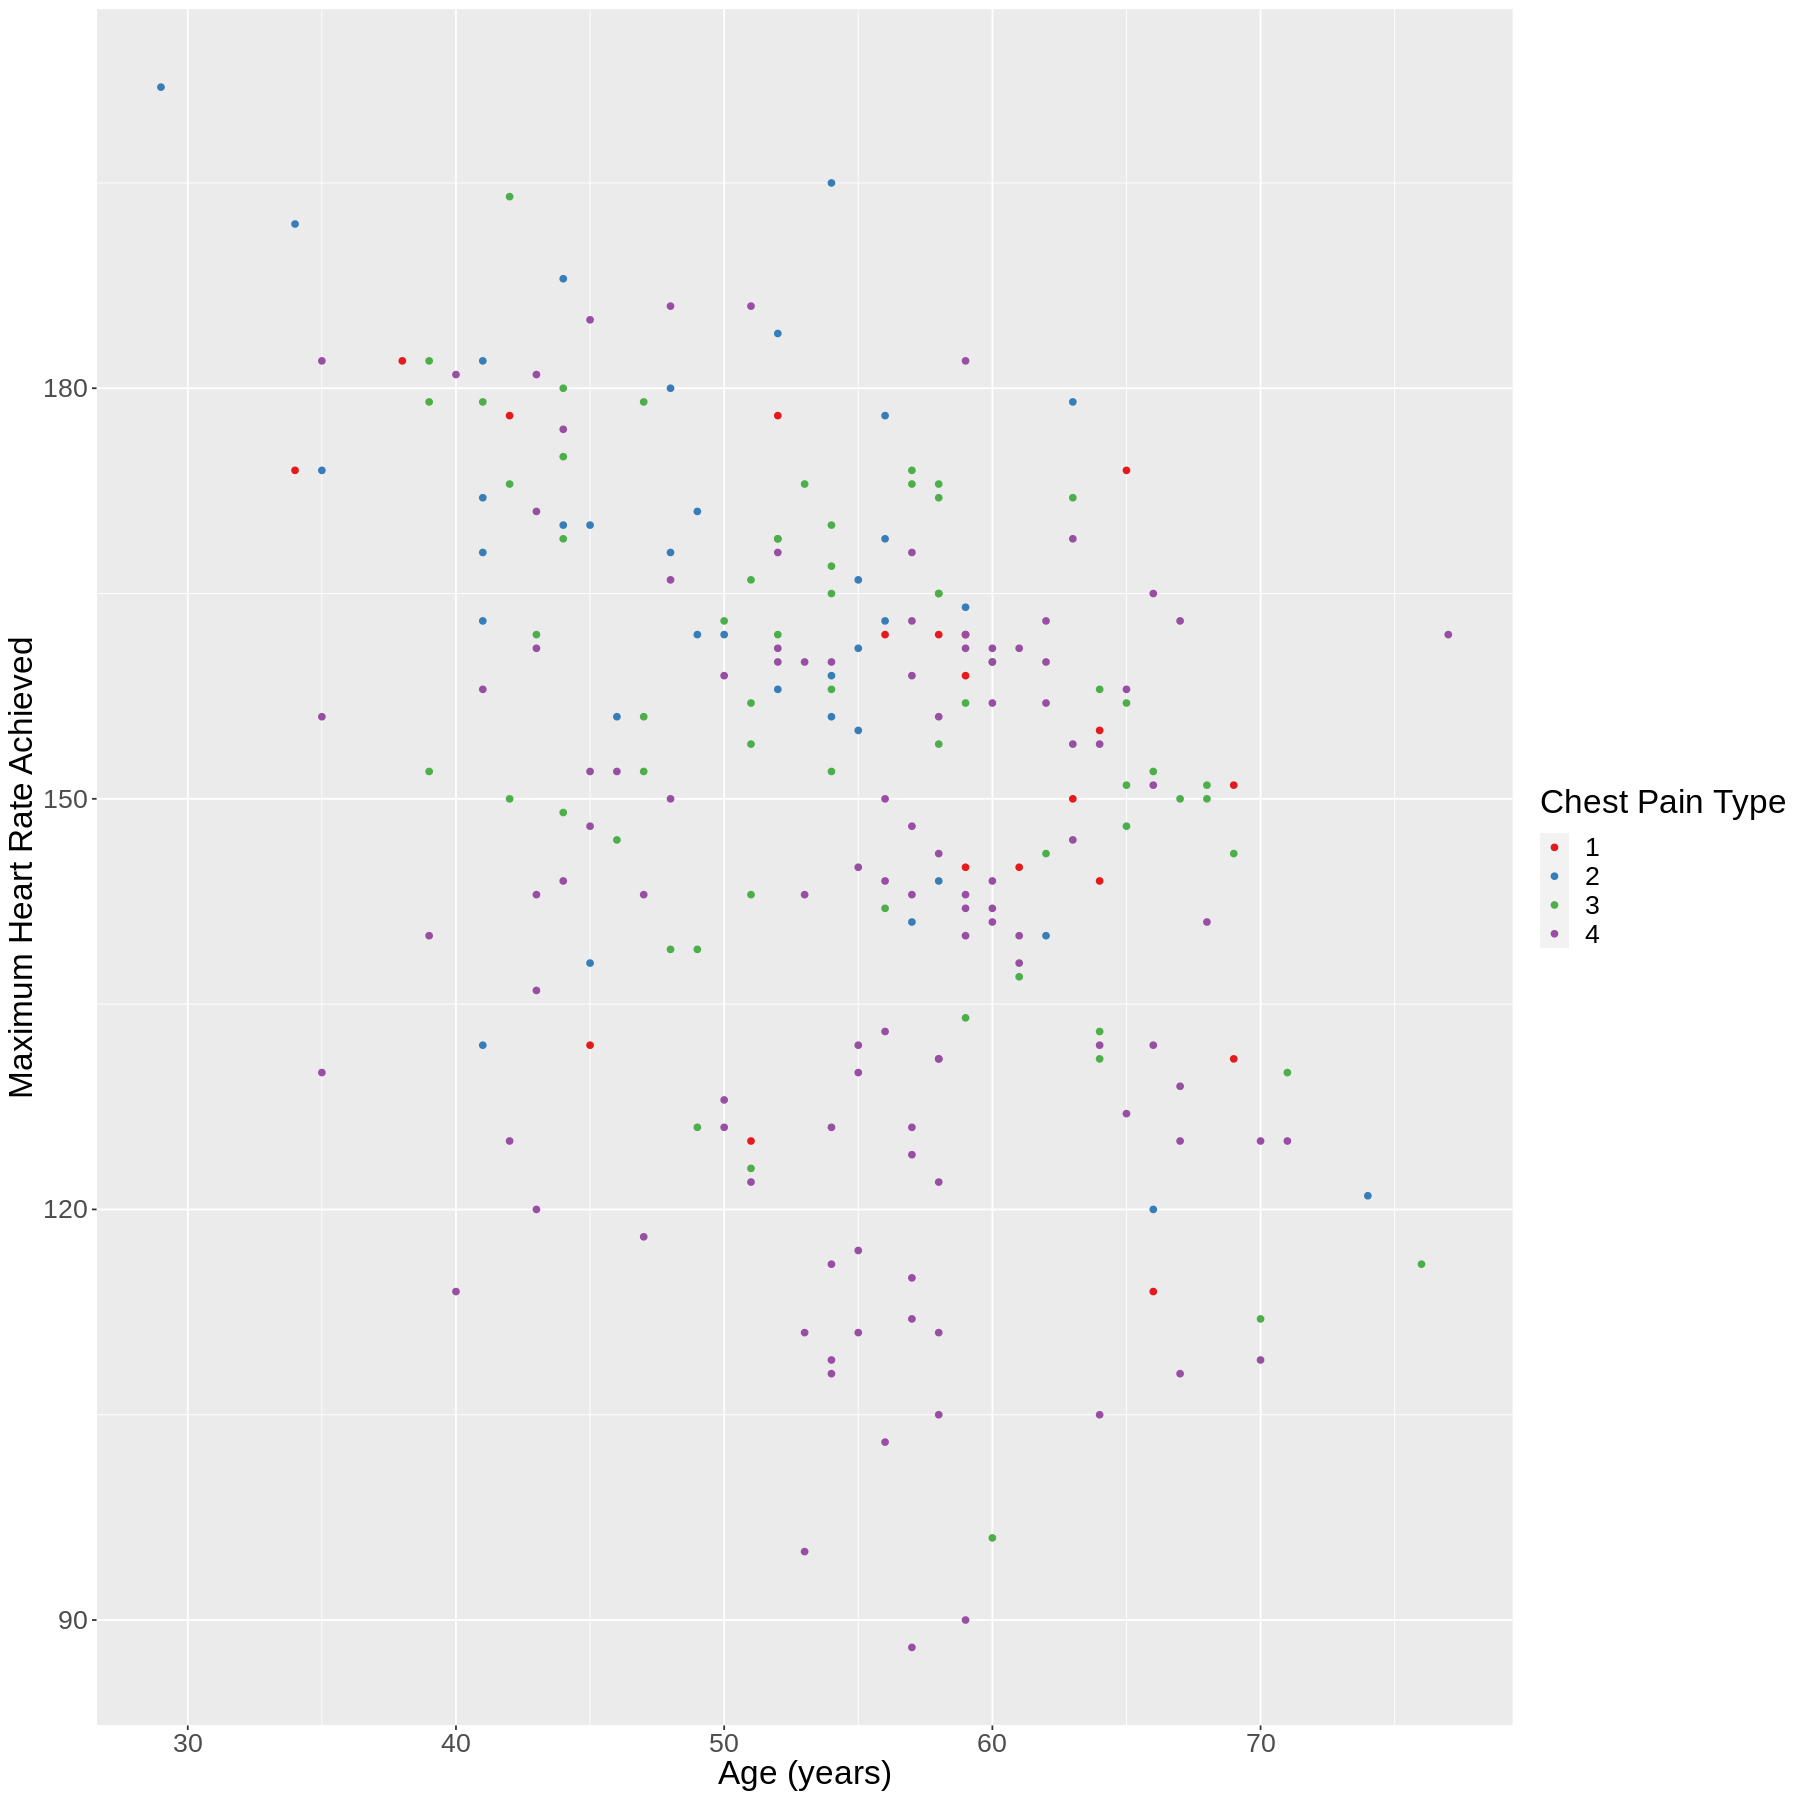

In [26]:
#using training data, visualize numeric predictors against each other to see distribution of data

restbp_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= restbp, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Resting Blood Pressure (mm Hg)",
            colour = 'Chest Pain Type') +
        geom_point() +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
restbp_plot

chol_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= chol, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Serum cholesterol (mg/dl)",
            colour = 'Chest Pain Type') +
        geom_point() +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
chol_plot

thalach_plot <- heart_train |>  
    ggplot(aes(x=age, 
               y= thalach, 
               colour = cp)) +
        labs(x = "Age (years)",
             y = "Maximum Heart Rate Achieved",
            colour = 'Chest Pain Type') +
        geom_point() +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
thalach_plot

As we can see, none of the plots really show a clear, distinct relationship between our target variable chest pain type and the tested predictors. This could be for many possible reasons. We only used numeric predictors - perhaps other predictors, such as sex, could yield a more clear distribution. In testing out the relationship between more variables, we could find a better predictor, or if any variable is a good predictor for chest pain at all. If results contain to produce no relationship then perhaps our target variable may need to be refined and could instead be generalized in predicting simply whether or not there is a heart disease diagnosis based on the chosen predictor variables.

In [27]:
library(GGally)
library(broom)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



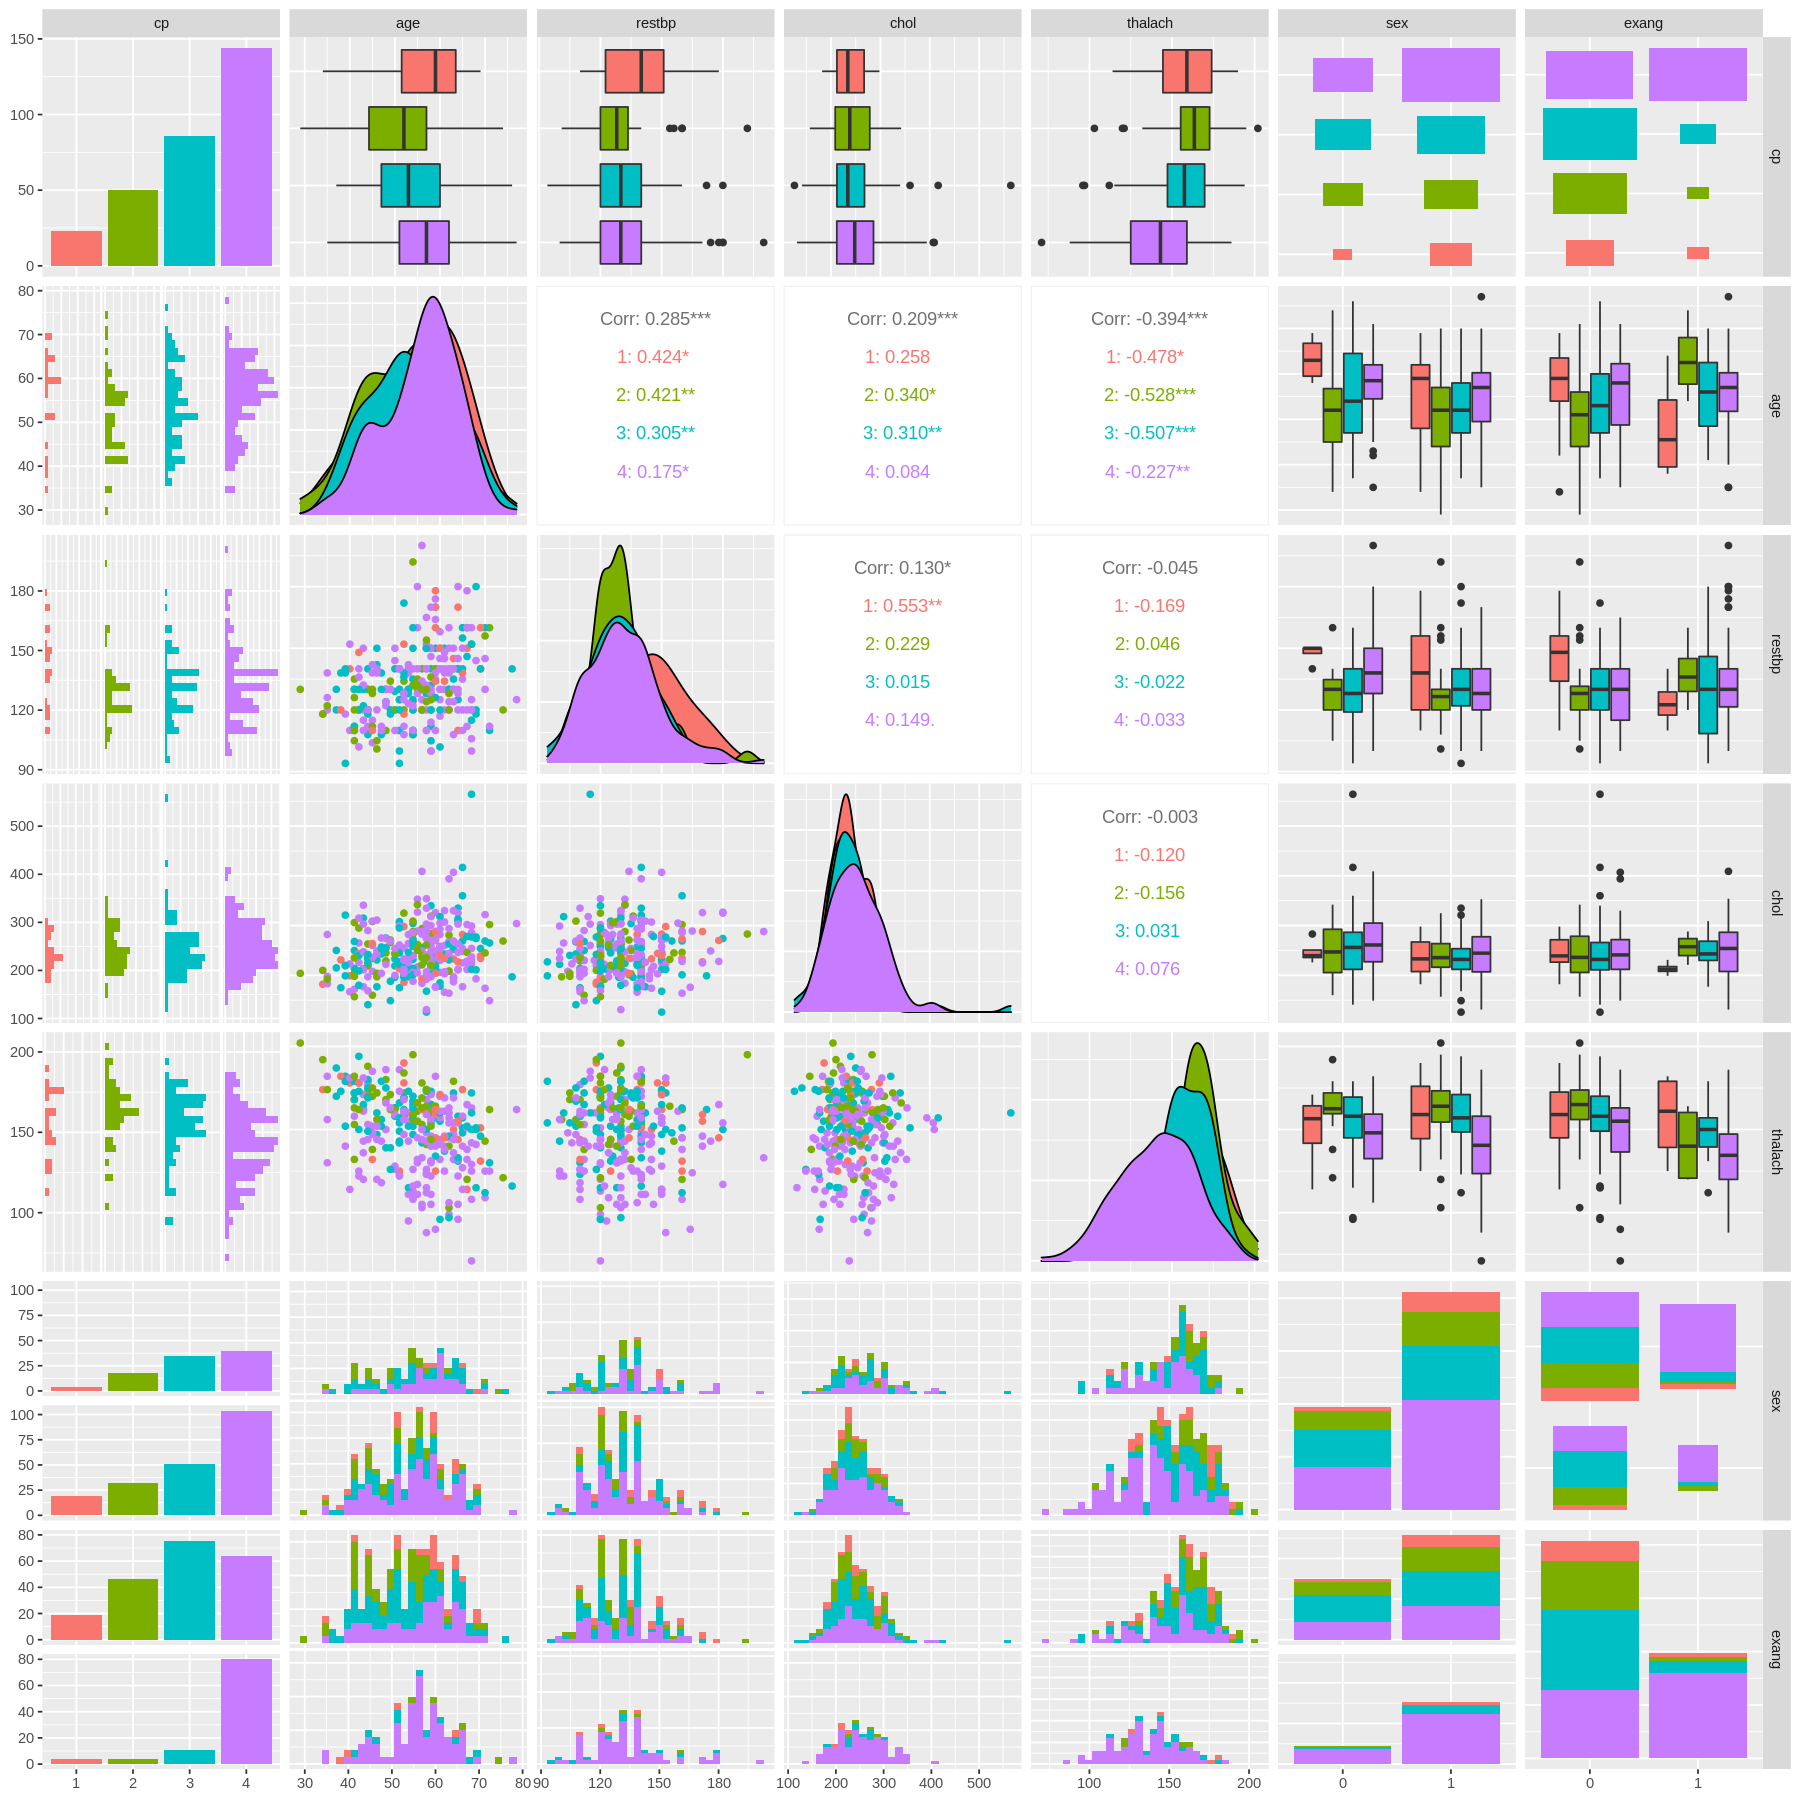

In [33]:
options(repr.plot.height = 15, repr.plot.width = 15)

heart_pairs <- filter_data |>
    ggpairs(mapping=ggplot2::aes(colour = cp))
heart_pairs

As we can see from the visualization above of each variable (from the filtered data) compared against each other, none of them show entirely clear relationships, with regard to chest pain type. However, it seems that `age` and `thalach` (maximum heart rate) seem to shown some level of distinction with chest pain types (compared to the other plots). In general, the purple data points (4) are around the bottom, the blue (3) at the top, and the red and green (1 and 2) are moderately scattered throughout. The other plots are completely randomly scattered. Thus, we will use these variables as predictors for our classification model, however, it is likely that our classification model will not have a high accuracy.


In addition, from previous literature, it seems that age and maximum heart rate are relevant factors relating to chest pain type. (more literature review)

## Methods & Results

Now that we have decided to use `age` and `thalach` as the predictors for our classification model, we can move on to our planned data analysis. We will start with creating a recipe, a knn specification model (using the `tune` function to determine what $k$ value to use, and our classifier with the training data set. Then, we will perform a cross-fold validation and test the metrics with $k$ values from 2-20, and plot the data to find our ideal $k$ value.

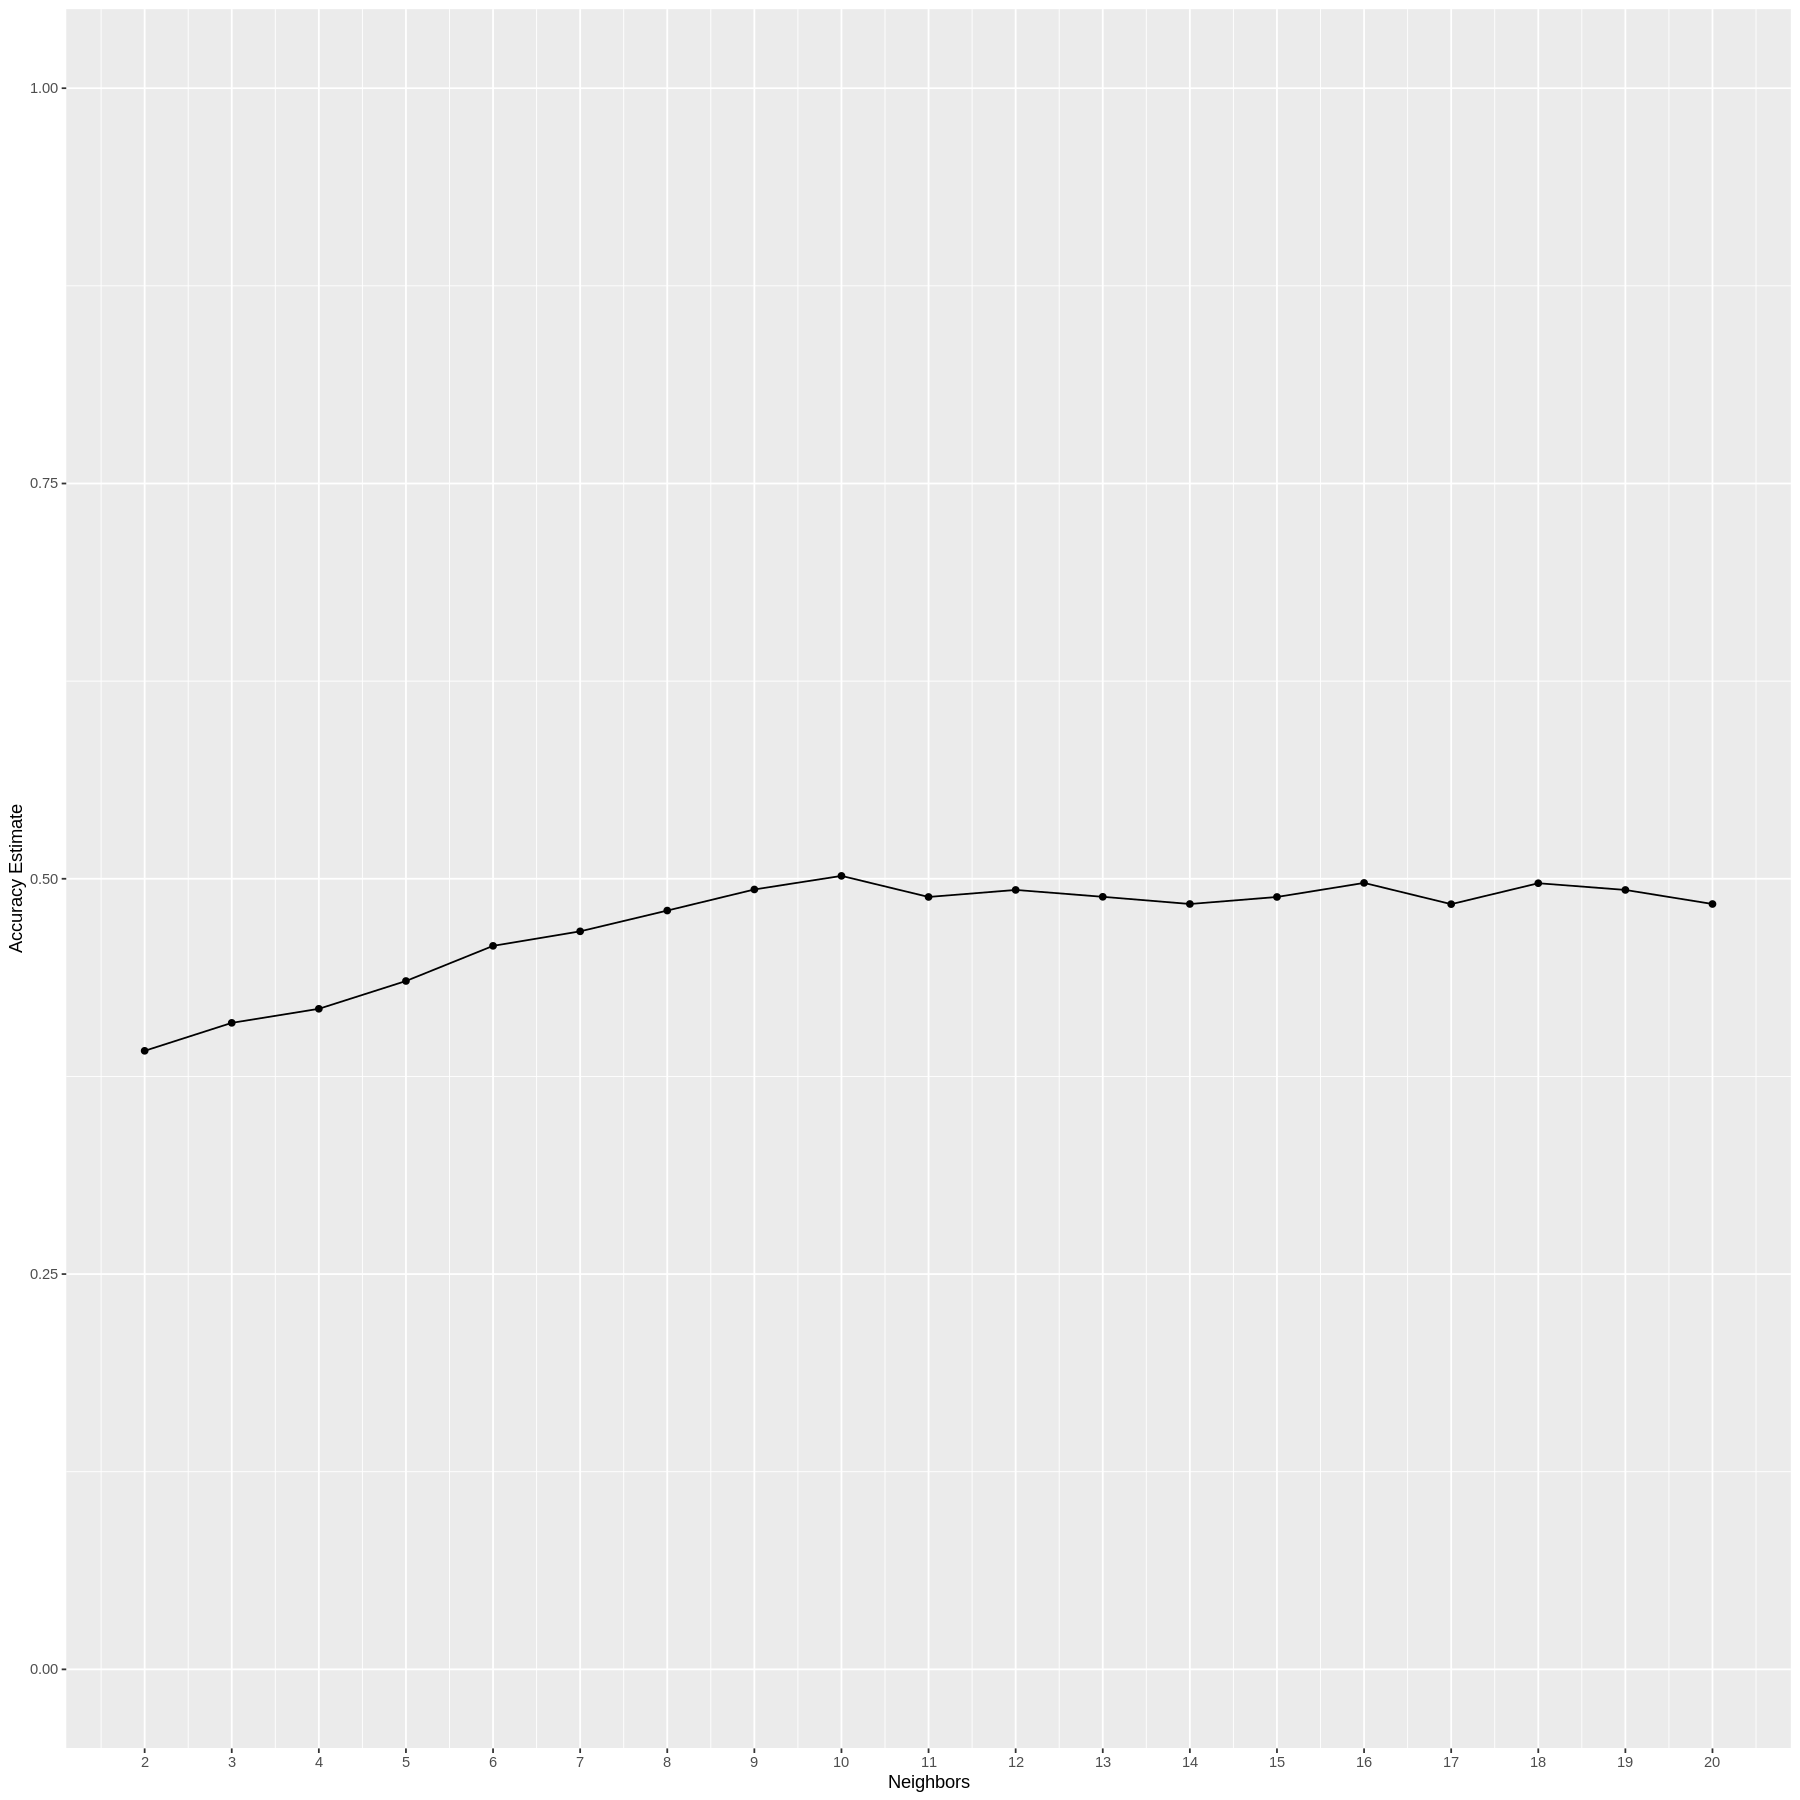

In [23]:
set.seed(1234) 

heart_recipe <- recipe(cp ~ age + thalach, data = heart_train)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 5, strata = cp)

gridvals <- tibble(neighbors = seq(2, 20, 1))

heart_workflow <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_spec) |>
       tune_grid(resamples = heart_vfold, grid = gridvals) |>
       collect_metrics()

accuracies <- heart_workflow |>
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 20, by = 1)) +  
       scale_y_continuous(limits = c(0, 1.0)) 
cross_val_plot

As we can see from the above plot, $k$=10 would be the best possible $k$ value, since its accuracy estimate is the highest among all the values plotted. We will now input that value into a new knn specification model and classifier.

In [27]:
set.seed(9999) 

new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(new_knn_spec) |>
       fit(data = heart_train)

Now that we have our final model, we can predict on the test dataset, and report the accuracy and confusion matrix of this prediction.

In [29]:
heart_predictions <- predict(heart_fit, heart_test) |>
    bind_cols(heart_test)
heart_predictions

heart_metrics <- heart_predictions |>
    metrics(truth = cp, estimate = .pred_class)
heart_metrics

heart_conf_mat <- heart_predictions |>
    conf_mat(truth = cp, estimate = .pred_class)
heart_conf_mat

.pred_class,cp,age,restbp,chol,thalach,sex,exang
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
3,3,37,130,250,187,1,0
2,4,53,140,203,155,1,1
4,2,56,140,294,153,0,0
3,2,44,120,263,173,1,0
4,2,58,120,284,160,1,0
4,4,60,130,206,132,1,1
3,3,50,120,219,158,0,0
3,3,44,130,233,179,1,1
3,4,42,140,226,178,1,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4743590
kap,multiclass,0.1483356


          Truth
Prediction  1  2  3  4
         1  0  0  0  0
         2  1  2  5  1
         3  2  6  8  9
         4  1  6 10 27

## Discussion

**Our Findings:**
We wanted to discover if it's possible to predict chest pain type for a given heart disease patient based on various revelent medical factors and patient information. Through our data analysis, we found that `age` and `thalach` (or maximum heart rate) would be the most likely medical factors to help with this prediction. After collecting metrics on our classification model, we found the accuracy to be 0.47. Thus, we can infer that it is possible to predict chest pain type, though the accuracy is not significantly high. We can assume there are many factors at play contributing to chest pain type, and it is difficult to predict what kind a patient may have.

**What we expected to find:**
We wanted to predict the type of chest pain (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) a patient with heart disease/conditions could expect to have based on relevent medical factors and personal information as noted by the variables of interest listed above. Since the graphs in our preliminary analysis did not show a clear distribution of data or a distinct relationship correlated with chest pain type, it was hard to determine what we would expect to find. Thus, we focused on refining our list of chosen predictor variables to determine whether the variables chosen are effective predictors or not. 
Our findings were (expected/not expected).

**Impact of our findings:**
Predicting chest pain type and therefore the severity of the chest pain can provide a physician with the necessary information needed to treat a patient's heart disease. Further data analysis could describe which factor(s), if any, directly lead to a certain chest pain type in order to help physicians when prescribing medications or choosing a course of action for a patient.

**Future Questions:**
- Is this classification model consistent with data in other parts of the world (eg. Hungary, Switzerland, etc)? 
- What other variables could be used in predicting chest pain that we haven't already accounted for, and if those variables were added, would that increase the estimate accuracy?
- Does there exist any diseases sharing the same predictor variables as chest pain? If so, how can we distinguish between these diseases and chest pain?

## References

Centers for Disease Control and Prevention. (2022, August 12). Heart disease deaths - health, United States. Centers for Disease Control and Prevention. Retrieved March 11, 2023, from https://www.cdc.gov/nchs/hus/topics/heart-disease-deaths.htm#:~:text=Heart%20disease%20has%20been%20the,excessive%20alcohol%20use%20(2)

Mayo Foundation for Medical Education and Research. (2023, March 3). Chest pain. Mayo Clinic. Retrieved March 11, 2023, from https://www.mayoclinic.org/diseases-conditions/chest-pain/symptoms-causes/syc-20370838

U.S. Department of Health and Human Services. (2022, March 24). Causes and risk factors. National Heart Lung and Blood Institute. Retrieved March 11, 2023, from https://www.nhlbi.nih.gov/health/angina/causes
